# Step 8: Burgers' Equation in 2D

Remember, Burgers' equation can generate discontinuous solutions from an initial condition that is smooth, i.e., can develop "shocks." We want to see this in two dimensions now!

Here is our coupled set of PDEs:

$$
\frac{\partial u}{\partial t} + u \frac{\partial u}{\partial x} + v \frac{\partial u}{\partial y} = \nu \left(\frac{\partial ^2 u}{\partial x^2} + \frac{\partial ^2 u}{\partial y^2}\right)
$$

$$
\frac{\partial v}{\partial t} + u \frac{\partial v}{\partial x} + v \frac{\partial v}{\partial y} = \nu \left(\frac{\partial ^2 v}{\partial x^2} + \frac{\partial ^2 v}{\partial y^2}\right)
$$

We know how to discretize each term: we've already done it before!

$$
\begin{split}
& \frac{u_{i,j}^{n+1} - u_{i,j}^n}{\Delta t} + u_{i,j}^n \frac{u_{i,j}^n-u_{i-1,j}^n}{\Delta x} + v_{i,j}^n \frac{u_{i,j}^n - u_{i,j-1}^n}{\Delta y} = \\
& \qquad \nu \left( \frac{u_{i+1,j}^n - 2u_{i,j}^n+u_{i-1,j}^n}{\Delta x^2} + \frac{u_{i,j+1}^n - 2u_{i,j}^n + u_{i,j-1}^n}{\Delta y^2} \right)
\end{split}
$$

$$
\begin{split}
& \frac{v_{i,j}^{n+1} - v_{i,j}^n}{\Delta t} + u_{i,j}^n \frac{v_{i,j}^n-v_{i-1,j}^n}{\Delta x} + v_{i,j}^n \frac{v_{i,j}^n - v_{i,j-1}^n}{\Delta y} = \\
& \qquad \nu \left( \frac{v_{i+1,j}^n - 2v_{i,j}^n+v_{i-1,j}^n}{\Delta x^2} + \frac{v_{i,j+1}^n - 2v_{i,j}^n + v_{i,j-1}^n}{\Delta y^2} \right)
\end{split}
$$

And now, we will rearrange each of these equations for the only unknown: the two components $u,v$ of the solution at the next time step:

$$
\begin{split}
u_{i,j}^{n+1} = & u_{i,j}^n - \frac{\Delta t}{\Delta x} u_{i,j}^n (u_{i,j}^n - u_{i-1,j}^n)  - \frac{\Delta t}{\Delta y} v_{i,j}^n (u_{i,j}^n - u_{i,j-1}^n) \\
&+ \frac{\nu \mathop\Delta\!t}{\Delta x^2}(u_{i+1,j}^n-2u_{i,j}^n+u_{i-1,j}^n) + \frac{\nu \mathop\Delta\!t}{\Delta y^2} (u_{i,j+1}^n - 2u_{i,j}^n + u_{i,j-1}^n)
\end{split}
$$

$$
\begin{split}
v_{i,j}^{n+1} = & v_{i,j}^n - \frac{\Delta t}{\Delta x} u_{i,j}^n (v_{i,j}^n - v_{i-1,j}^n) - \frac{\Delta t}{\Delta y} v_{i,j}^n (v_{i,j}^n - v_{i,j-1}^n) \\
&+ \frac{\nu\,\Delta t}{\Delta x^2}(v_{i+1,j}^n-2v_{i,j}^n+v_{i-1,j}^n) + \frac{\nu\,\Delta t}{\Delta y^2} (v_{i,j+1}^n - 2v_{i,j}^n + v_{i,j-1}^n)
\end{split}
$$

In [1]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np

%matplotlib inline
%config InlineBackend.figure_format = "svg"
import matplotlib.pyplot as plt
import matplotlib.animation as anim

plt.rcParams["animation.html"] = "html5"
from matplotlib import cm


def plot3d_field(field, zlabel=None, zlim=None):
    global x
    global y
    X, Y = np.meshgrid(x, y)
    fig, ax = plt.subplots(figsize=(11, 7), dpi=300, subplot_kw={"projection": "3d"})
    ax.plot_surface(
        X,
        Y,
        field,
        cmap=cm.coolwarm,
        rstride=1,
        cstride=1,
        antialiased=False,
        linewidth=0,
    )
    ax.set_xlabel(r"$x$")
    ax.set_ylabel(r"$y$")
    if zlabel is not None:
        ax.set_zlabel(zlabel)
    if zlim is not None:
        ax.set_zlim(*zlim)
    ax.set_box_aspect(aspect=None, zoom=0.8)
    plt.show()

In [2]:
# Solution parameter

x_domain_interval: tuple[float] = (0.0, 2.0)
y_domain_interval: tuple[float] = (0.0, 2.0)
nx: int = 41
ny: int = 41
nt: int = 120
c: float = 5.0
nu: float = 0.1
dx: float = (x_domain_interval[1] - x_domain_interval[0]) / (nx - 1)
dy: float = (y_domain_interval[1] - y_domain_interval[0]) / (ny - 1)
sigma: float = 0.0009
dt: float = sigma * dx * dy / nu

# Domain
x: np.ndarray = np.linspace(*x_domain_interval, nx)
y: np.ndarray = np.linspace(*y_domain_interval, ny)

# Grid of coordinate points
X, Y = np.meshgrid(x, y)

## Initial and Boundary Conditions

In [3]:
# Same as step 6
u = np.ones((ny, nx))
v = np.ones((ny, nx))
comb = np.ones((ny, nx))

# - Assign initial conditions

# Set hat function I.C. : u(.5<=x<=1 && .5<=y<=1 ) is 2
u[int(0.5 / dy) : int(1 / dy + 1), int(0.5 / dx) : int(1 / dx + 1)] = 2
u0 = u.copy()

# Set hat function I.C. : u(.5<=x<=1 && .5<=y<=1 ) is 2
v[int(0.5 / dy) : int(1 / dy + 1), int(0.5 / dx) : int(1 / dx + 1)] = 2
v0 = v.copy()

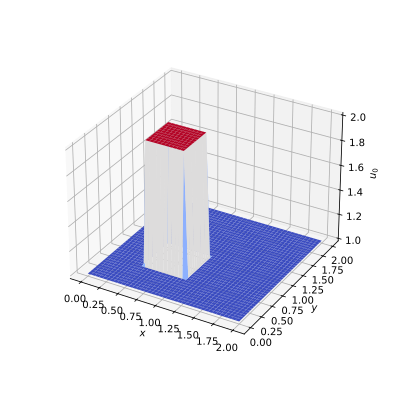

In [4]:
plot3d_field(u0, zlabel=r"$u_0$")

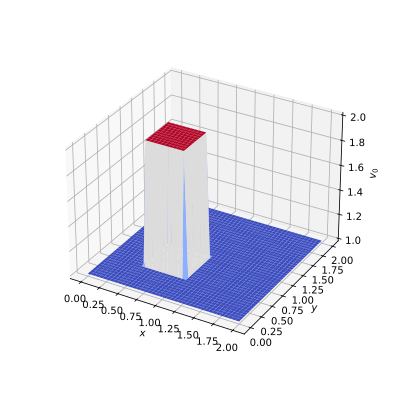

In [5]:
plot3d_field(u0, zlabel=r"$v_0$")

In [6]:
solutions = [(u0.copy(), v0.copy())]

u = u0.copy()
v = v0.copy()

for n in range(nt + 1):
    un = u.copy()
    vn = v.copy()

    u[1:-1, 1:-1] = (
        un[1:-1, 1:-1]
        - dt / dx * un[1:-1, 1:-1] * (un[1:-1, 1:-1] - un[1:-1, 0:-2])
        - dt / dy * vn[1:-1, 1:-1] * (un[1:-1, 1:-1] - un[0:-2, 1:-1])
        + nu * dt / dx**2 * (un[1:-1, 2:] - 2 * un[1:-1, 1:-1] + un[1:-1, 0:-2])
        + nu * dt / dy**2 * (un[2:, 1:-1] - 2 * un[1:-1, 1:-1] + un[0:-2, 1:-1])
    )

    v[1:-1, 1:-1] = (
        vn[1:-1, 1:-1]
        - dt / dx * un[1:-1, 1:-1] * (vn[1:-1, 1:-1] - vn[1:-1, 0:-2])
        - dt / dy * vn[1:-1, 1:-1] * (vn[1:-1, 1:-1] - vn[0:-2, 1:-1])
        + nu * dt / dx**2 * (vn[1:-1, 2:] - 2 * vn[1:-1, 1:-1] + vn[1:-1, 0:-2])
        + nu * dt / dy**2 * (vn[2:, 1:-1] - 2 * vn[1:-1, 1:-1] + vn[0:-2, 1:-1])
    )

    u[0, :] = 1
    u[-1, :] = 1
    u[:, 0] = 1
    u[:, -1] = 1

    v[0, :] = 1
    v[-1, :] = 1
    v[:, 0] = 1
    v[:, -1] = 1

    solutions.append((u.copy(), v.copy()))

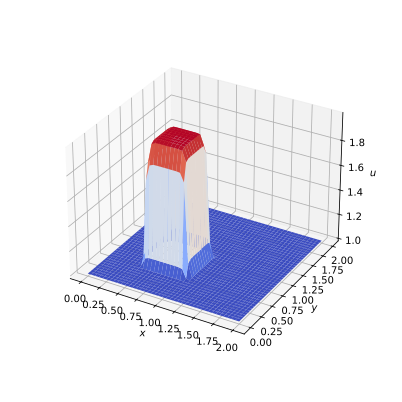

In [7]:
plot3d_field(u, r"$u$")

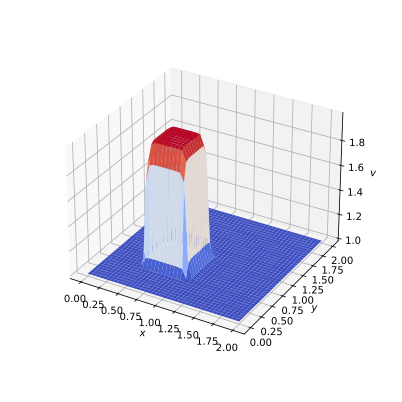

In [8]:
plot3d_field(v, r"$v$")

## Animation

In [9]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
plt.close()


def update_anim(frame):
    ax.cla()
    ax.plot_surface(X, Y, solutions[frame][0], cmap=cm.coolwarm)
    ax.set_zlim([1.0, 2.05])
    ax.set_zlabel(r"$u$")
    return (fig,)


ani = anim.FuncAnimation(
    fig, func=update_anim, frames=len(solutions), interval=35, blit=True
)
ani

In [10]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
plt.close()


def update_anim(frame):
    ax.cla()
    ax.plot_surface(X, Y, solutions[frame][1], cmap=cm.coolwarm)
    ax.set_zlim([1.0, 2.05])
    ax.set_zlabel(r"$u$")
    return (fig,)


ani = anim.FuncAnimation(
    fig, func=update_anim, frames=len(solutions), interval=35, blit=True
)
ani